In [50]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd


In [51]:
img_dir = '../img/'

# Setup plotting
plotting.setup_mpl()

# Enable the cache
ff1.Cache.enable_cache('../../../cache')

# Get rid of some pandas warnings that are not relevant for us at the moment
pd.options.mode.chained_assignment = None


In [52]:
# Load the session data
race = ff1.get_session(2022, 'Netherlands', 'R')

# Get the laps
laps = race.load_laps(with_telemetry=True)


/home/ilias/anaconda3/lib/python3.9/site-packages/fastf1/core.py:1220: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Dutch Grand Prix - Race [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '63', '16', '44', '11', '14', '4', '55', '

In [53]:
# Get laps of the drivers (SAI and PER)
laps_driver1 = laps.pick_driver('SAI')
laps_driver2 = laps.pick_driver('PER')

laps_driver1['RaceLapNumber'] = laps_driver1['LapNumber'] - 1
laps_driver2['RaceLapNumber'] = laps_driver2['LapNumber'] - 1


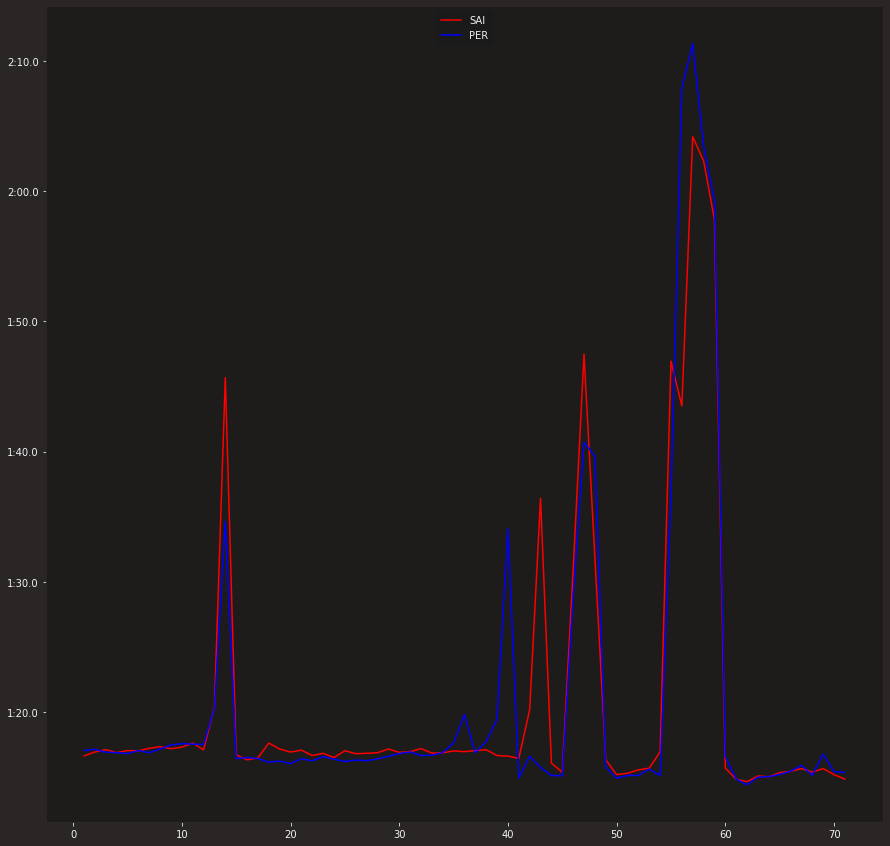

In [54]:
plt.rcParams['figure.figsize'] = [15, 15]

plt.plot(laps_driver1['RaceLapNumber'],
         laps_driver1['LapTime'], label='SAI', color='red')
plt.plot(laps_driver2['RaceLapNumber'],
         laps_driver2['LapTime'], label='PER', color='blue')
# plt.set(ylabel='Laptime', xlabel='Lap')
plt.legend(loc="upper center")
plt.savefig(img_dir + 'race_pace_ver_ham_dutchGP2022.png', dpi=300)
plt.show()


In [55]:
# Get lap data
lap_telemetry_driver1_59 = laps_driver1.loc[laps_driver1['RaceLapNumber'] == 59].get_car_data().add_distance()
lap_telemetry_driver2_59 = laps_driver2.loc[laps_driver2['RaceLapNumber'] == 59].get_car_data().add_distance()
lap_telemetry_driver1_60 = laps_driver1.loc[laps_driver1['RaceLapNumber'] == 60].get_car_data().add_distance()
lap_telemetry_driver2_60 = laps_driver2.loc[laps_driver2['RaceLapNumber'] == 60].get_car_data().add_distance()

# Distance

ltd1_1_dist = lap_telemetry_driver1_59['Distance'].loc[(lap_telemetry_driver1_59['Distance'] >= 3550)].tolist()
ltd1_2_dist = lap_telemetry_driver1_60['Distance'].loc[(lap_telemetry_driver1_60['Distance'] <= 600)].tolist()
ltd2_1_dist = lap_telemetry_driver1_59['Distance'].loc[(lap_telemetry_driver1_59['Distance'] >= 3550)].tolist()
ltd2_2_dist = lap_telemetry_driver2_60['Distance'].loc[(lap_telemetry_driver2_60['Distance'] <= 600)].tolist()

for i in range(len(ltd1_2_dist)):
    ltd1_2_dist[i] += 4225.183
for i in range(len(ltd2_2_dist)):
    ltd2_2_dist[i] += 4225.183

for i in ltd1_2_dist:
    ltd1_1_dist.append(i)

for i in ltd2_2_dist:
    ltd2_1_dist.append(i)

# Speed

ltd1_1_speed = lap_telemetry_driver1_59['Speed'].loc[(lap_telemetry_driver1_59['Distance'] >= 3550)].tolist()
ltd1_2_speed = lap_telemetry_driver1_60['Speed'].loc[(lap_telemetry_driver1_60['Distance'] <= 600)].tolist()
ltd2_1_speed = lap_telemetry_driver1_59['Speed'].loc[(lap_telemetry_driver1_59['Distance'] >= 3550)].tolist()
ltd2_2_speed = lap_telemetry_driver2_60['Speed'].loc[(lap_telemetry_driver2_60['Distance'] <= 600)].tolist()

for i in ltd1_2_speed:
    ltd1_1_speed.append(i)

for i in ltd2_2_speed:
    ltd2_1_speed.append(i)

# Throttle

ltd1_1_throttle = lap_telemetry_driver1_59['Throttle'].loc[(lap_telemetry_driver1_59['Distance'] >= 3550)].tolist()
ltd1_2_throttle = lap_telemetry_driver1_60['Throttle'].loc[(lap_telemetry_driver1_60['Distance'] <= 600)].tolist()
ltd2_1_throttle = lap_telemetry_driver1_59['Throttle'].loc[(lap_telemetry_driver1_59['Distance'] >= 3550)].tolist()
ltd2_2_throttle = lap_telemetry_driver2_60['Throttle'].loc[(lap_telemetry_driver2_60['Distance'] <= 600)].tolist()

for i in ltd1_2_throttle:
    ltd1_1_throttle.append(i)

for i in ltd2_2_throttle:
    ltd2_1_throttle.append(i)

# Brake

ltd1_1_brake = lap_telemetry_driver1_59['Brake'].loc[(lap_telemetry_driver1_59['Distance'] >= 3550)].tolist()
ltd1_2_brake = lap_telemetry_driver1_60['Brake'].loc[(lap_telemetry_driver1_60['Distance'] <= 600)].tolist()
ltd2_1_brake = lap_telemetry_driver1_59['Brake'].loc[(lap_telemetry_driver1_59['Distance'] >= 3550)].tolist()
ltd2_2_brake = lap_telemetry_driver2_60['Brake'].loc[(lap_telemetry_driver2_60['Distance'] <= 600)].tolist()

for i in ltd1_2_brake:
    ltd1_1_brake.append(i)

for i in ltd2_2_brake:
    ltd2_1_brake.append(i)


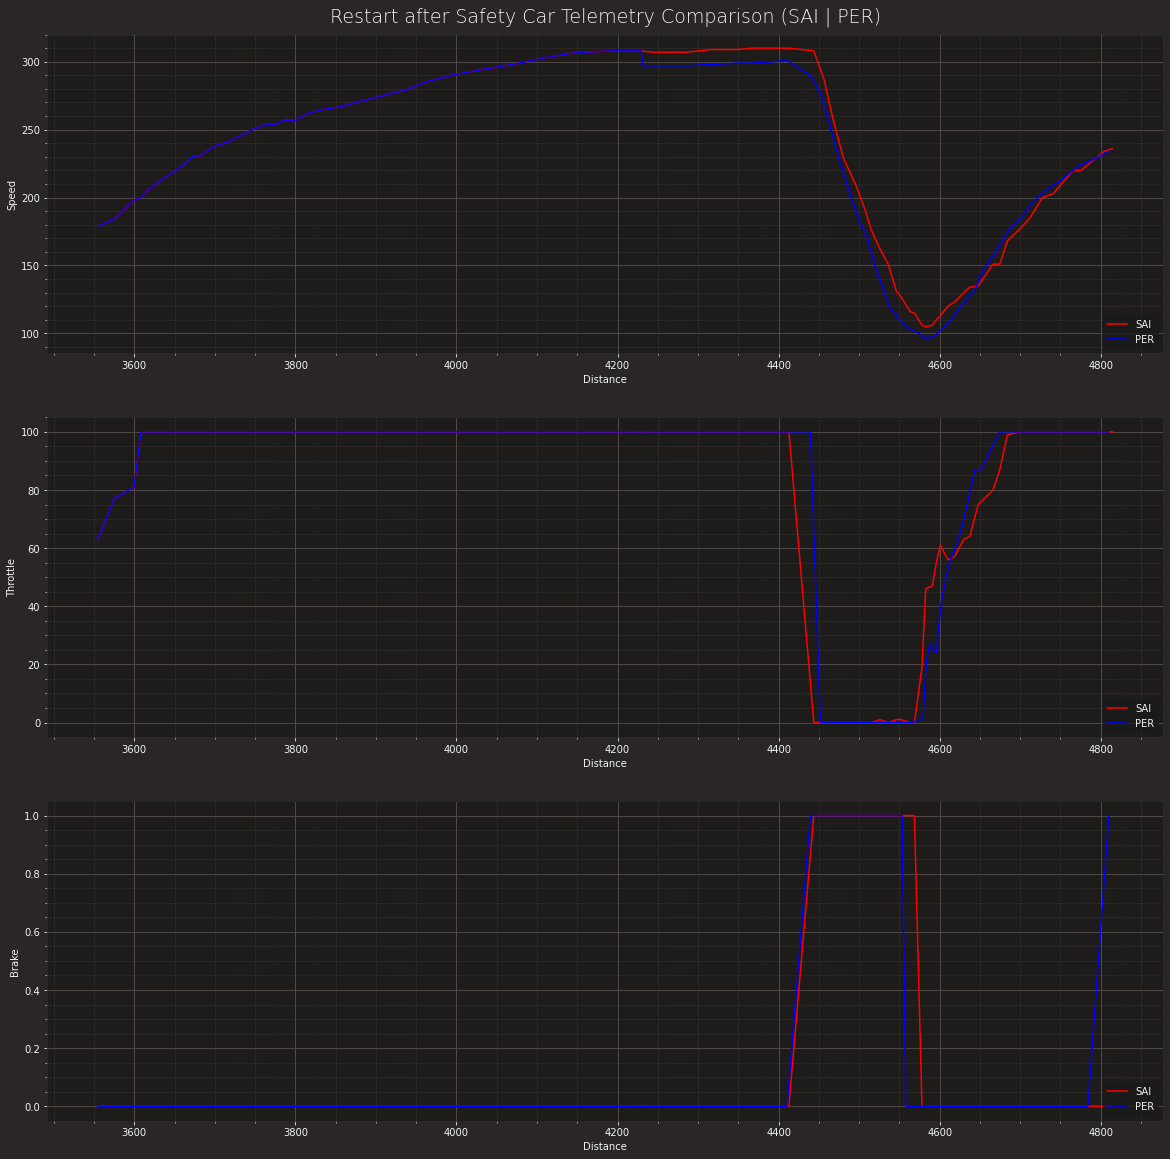

In [56]:
# Make plot a bit bigger
plt.rcParams['figure.figsize'] = [20, 20]

fig, ax = plt.subplots(3)

ax[0].title.set_text("Restart after Safety Car Telemetry Comparison (SAI | PER)")
ax[0].plot(ltd1_1_dist, ltd1_1_speed, label='SAI', color='red')
ax[0].plot(ltd2_1_dist, ltd2_1_speed, label='PER', color='blue')
ax[0].set(ylabel='Speed')
ax[0].set(xlabel='Distance')
ax[0].legend(loc="lower right")

ax[1].plot(ltd1_1_dist, ltd1_1_throttle, label='SAI', color='red')
ax[1].plot(ltd2_1_dist, ltd2_1_throttle, label='PER', color='blue')
ax[1].set(ylabel='Throttle')
ax[1].set(xlabel='Distance')
ax[1].legend(loc="lower right")

ax[2].plot(ltd1_1_dist, ltd1_1_brake, label='SAI', color='red')
ax[2].plot(ltd2_1_dist, ltd2_1_brake, label='PER', color='blue')
ax[2].set(ylabel='Brake')
ax[2].set(xlabel='Distance')
ax[2].legend(loc="lower right")

plt.savefig(img_dir + 'lap_59_60_sai_per_overtake_dutchGP2022.png', dpi=300)
plt.show()
